# Extraction of 8-bins RGB for each image:

In this notebook is shown the code needed to scan each image and extract the 8-bins R, G and B. All the information is later on added to the original dataframe. The prediccion result can be seen in the folder "2.Trainings and predictions". 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()


In [33]:
df=pd.read_csv('ntcir12.csv',sep=',', index_col='Unnamed: 0')

In [34]:
tags=['person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove','day_of_week']


In [35]:
df.index = pd.to_datetime(df.index)

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import other features
from sklearn.metrics import accuracy_score

In [38]:
df = df.dropna(how='any',subset=["activity"],axis=0)

In [39]:
df = df.fillna(0)

This are all the images:

In [40]:
images =df['image_path'].values

In [41]:
def get_median_RGBchannels(file):
    root_file = './'
    image= plt.imread(root_file+file)
    #img_pixels= image.flatten()
    red= image[:,:,0]
    green= image[:,:,1]
    blue= image[:,:,2]
    
    return red, green, blue
   




In [42]:
len(df['image_path'])

47757

We will extract 8 bins for each R, G and B color channel in every image. These will be the new tags:

In [45]:
column_bins = ['R_bin1', 'R_bin2', 'R_bin3', 'R_bin4', 'R_bin5', 'R_bin6', 'R_bin7', 'R_bin8','G_bin1', 'G_bin2', 'G_bin3', 'G_bin4', 'G_bin5', 'G_bin6', 'G_bin7', 'G_bin8','B_bin1', 'B_bin2', 'B_bin3', 'B_bin4', 'B_bin5', 'B_bin6', 'B_bin7', 'B_bin8']

In [46]:
for i in range(len(column_bins)):
    df[column_bins[i]] = 0

In [47]:
for i in range(len(df['image_path'])):

    try:
        file = df['image_path'][i]
        root_file = './'
        image= plt.imread(root_file+file)
        red, green, blue = get_median_RGBchannels(file)

        bin_counts_red, bin_edges_red = np.histogram(red,bins=8) #Red bins
        bin_counts_green, bin_edges_green = np.histogram(green,bins=8) #Green bins
        bin_counts_blue, bin_edges_blue = np.histogram(blue,bins=8) #Blue bins
        for j in range(8):
            df[column_bins[j]][i] = bin_counts_red[j]
            df[column_bins[j+8]][i] = bin_counts_green[j]
            df[column_bins[j+16]][i] = bin_counts_blue[j]
    except:
        print('error')
        print(df['image_path'][i])
        print('*****')

C:\Users\Aleix\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aleix\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Aleix\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


error
/u2/2015-06-19/b00003549_21i7lf_20150619_115501e.jpg
*****
error
/u2/2015-06-19/b00003550_21i7lf_20150619_115536e.jpg
*****
error
/u2/2015-06-19/b00003551_21i7lf_20150619_115620e.jpg
*****
error
/u2/2015-06-19/b00003552_21i7lf_20150619_115702e.jpg
*****
error
/u2/2015-06-19/b00003553_21i7lf_20150619_115740e.jpg
*****
error
/u2/2015-06-19/b00003556_21i7lf_20150619_115928e.jpg
*****
error
/u2/2015-06-19/b00003557_21i7lf_20150619_120008e.jpg
*****
error
/u2/2015-06-19/b00003558_21i7lf_20150619_120046e.jpg
*****
error
/u2/2015-06-19/b00003559_21i7lf_20150619_120127e.jpg
*****
error
/u2/2015-06-19/b00003560_21i7lf_20150619_120200e.jpg
*****
error
/u2/2015-06-19/b00003561_21i7lf_20150619_120239e.jpg
*****
error
/u2/2015-06-19/b00003562_21i7lf_20150619_120322e.jpg
*****
error
/u2/2015-06-19/b00003563_21i7lf_20150619_120403e.jpg
*****
error
/u2/2015-06-19/b00003564_21i7lf_20150619_120442e.jpg
*****
error
/u2/2015-06-19/b00003565_21i7lf_20150619_120459e.jpg
*****
error
/u2/2015-06-19/b000

An example of the 8-bins for the R channel in a selected image:

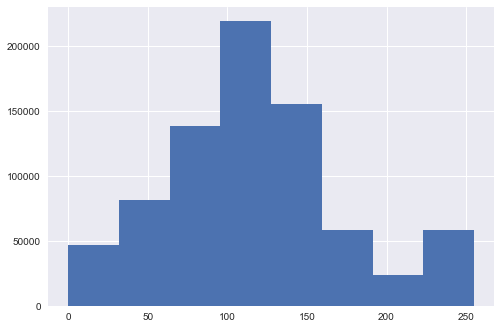

In [48]:
plt.hist(red.flatten(),bins=8)
plt.show()

In [49]:
df

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,G_bin7,G_bin8,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,B_bin8
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,20030,21607,17917,164327,119845,198698,147986,97312,10082,27193
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,38,31,52658,91919,144227,290851,202657,983,38,27
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,3093,5890,121883,167027,147589,288862,44285,5771,2725,5218
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,2097,1230,106987,286990,193422,172602,18863,2805,1098,593
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,5235,21,35120,116526,184324,340945,80136,1309,1316,23684
2015-02-23 07:08:59,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070859_11,/u1/2015-02-23/b00000011_21i6bq_20150223_07085...,Home,male,...,26851,59717,101288,141775,243870,126789,20250,9804,14761,124823
2015-02-23 07:09:31,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070931_1,/u1/2015-02-23/b00000012_21i6bq_20150223_07093...,Home,male,...,30786,72254,136976,150810,214431,114902,18561,12126,15102,120452
2015-02-23 07:10:08,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,having drinks\meal alone,u1_2015-02-23_071008_1,/u1/2015-02-23/b00000013_21i6bq_20150223_07100...,Home,male,...,101824,30099,37229,185850,169138,200855,146570,43611,93,14
2015-02-23 07:10:46,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,tv,u1_2015-02-23_071046_2,/u1/2015-02-23/b00000014_21i6bq_20150223_07104...,Home,male,...,10175,34973,5909,23981,215943,365145,116431,15076,9117,31758
2015-02-23 07:11:19,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,tv,u1_2015-02-23_071119_1,/u1/2015-02-23/b00000015_21i6bq_20150223_07111...,Home,male,...,10455,35295,9461,23756,204131,361970,122954,17978,10195,32915


The new dataframe has all the bins, now we need to normalize each column to have values between 0 and 1:

In [50]:
df['G_bin7'].max()

587440

In [51]:
maximums = np.zeros(8*3)

In [52]:
for i in range(8*3):
    maximums[i]=df[str(column_bins[i])].max()

In [53]:
maximums

array([ 783299.,  742845.,  711074.,  678275.,  650282.,  629296.,
        699618.,  405700.,  783309.,  719313.,  653279.,  661577.,
        637363.,  603183.,  587440.,  409641.,  783335.,  640665.,
        688356.,  654270.,  589891.,  578262.,  529383.,  442803.])

In [54]:
for i in range(8*3):
    df[str(column_bins[i])] = df[str(column_bins[i])]/maximums[i]

Let's save the new dataframe:

In [55]:
df.to_csv('dataframe_with_RGB_bins.csv', sep='\t')